In [3]:
from copy import copy
from copy import deepcopy
import glob
import math
from random import random
import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1 import Grid
import numpy as np
import seaborn as sns

import seaborn as sbn
sbn.set(rc={'image.cmap': 'cubehelix'})
sbn.set_style("white")

import hedges

print "Python version: ", sys.version
print "numpy version: ", np.__version__
print "matplotlib version: ", matplotlib.__version__

#Plotting style variables
linestyles = ['-', '--', '-.',':']
linecols = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"],
            sns.xkcd_rgb["medium green"],sns.xkcd_rgb["black"]]

%matplotlib inline

Python version:  2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
numpy version:  1.11.3
matplotlib version:  2.0.2


In [16]:
import memmodel as mem
import hedges as hds

In [74]:
#######################################################
# Parameters - Section 5.3
#######################################################
sigma = 6.77 * 10**(-7) #Equation 5.14
# Birth Rates (per second)
b_A = 4.74*10**(-6) 
b_B = 4.74*10**(-7)
# Death Rates (per second)
d_A = 1.39*10**(-6) 
d_B = 1.39*10**(-7)
#Death Rates, drug (per second)
d_A_drug = 5.56*10**(-6) * 2.
d_B_drug = d_B

#######################################################
# The bistable switches.
#######################################################
g_max = 61
DC_hedge = hds.DC_hedge_xy
DCx_hedge = hds.DCx_hedge_xy
DCy_hedge = hds.DCy_hedge_xy
AM_hedge = hds.get_AM_hedge_load(30,30)
hedges = [DC_hedge, DCx_hedge, DCy_hedge, AM_hedge]
gs_sets = [[30,7,53, 30],[59,46,59,39]]

#######################################################
# Plotting parameters
#######################################################
cols = [sns.xkcd_rgb['pale purple'], sns.xkcd_rgb['sage green'], sns.xkcd_rgb['tangerine']]
styles = ['--', '-', 'dotted'] 
mem_strat_names = ["SG", "EM", "CM"]
labels = ["Strong Genetic", "Epigenetic Memory", "Constrained Memory"]
hedge_names = ["DC", "DCx", "DCy", "AM"]

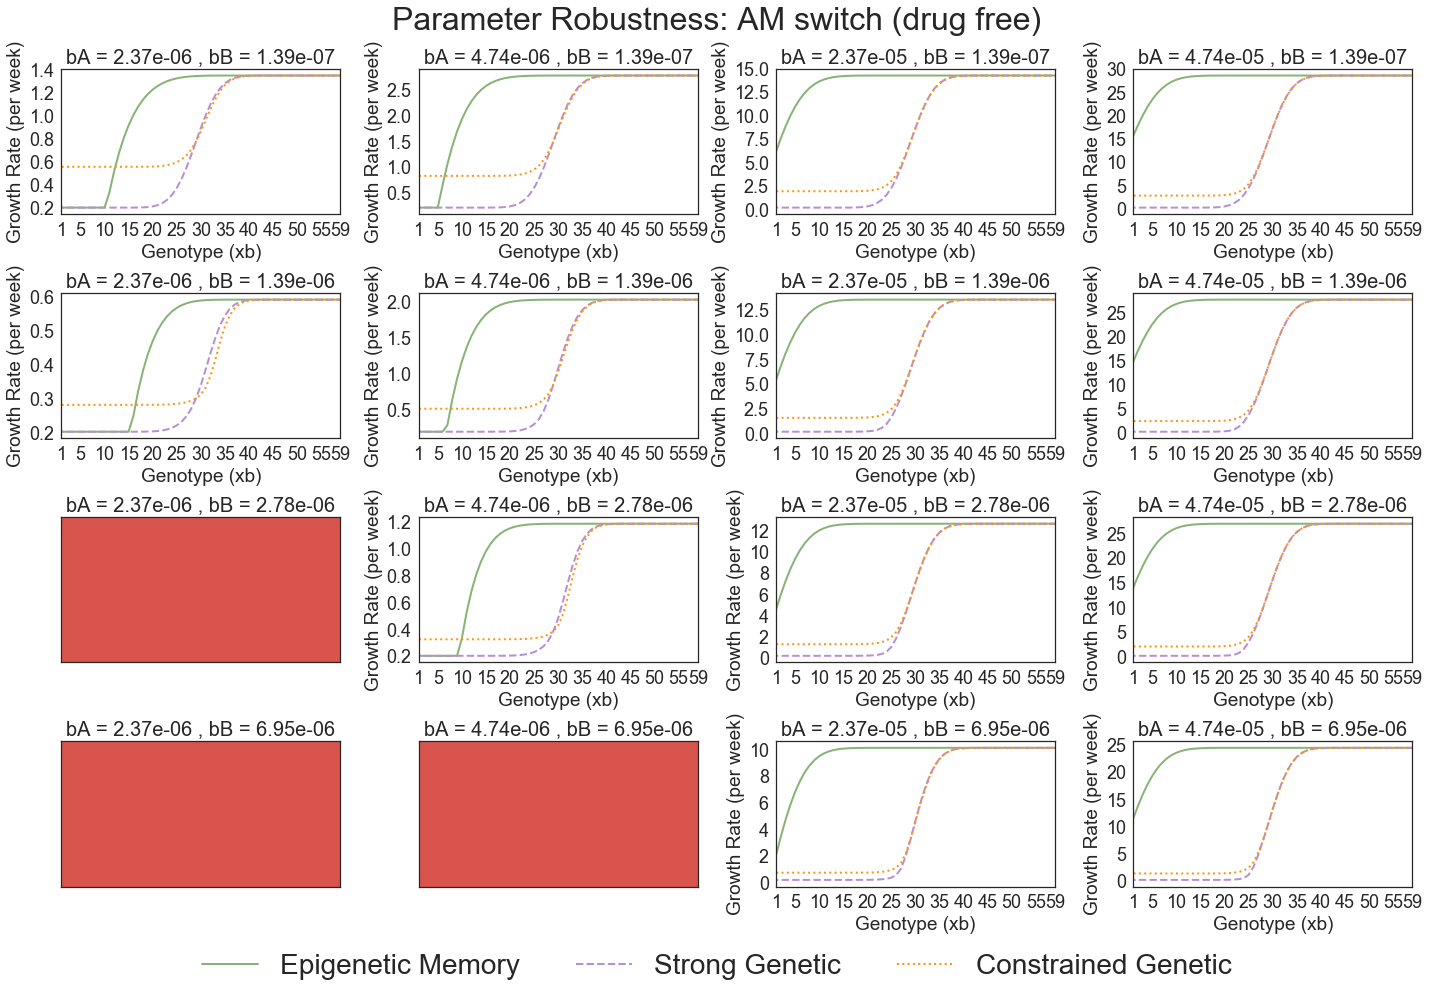

In [139]:
name = "AM"
hedge = AM_hedge
unconstrained_max = 1.0
gmax=60
plt.figure(figsize=(20,14))
for d_ix, d in enumerate([0.1*d_A, d_A, 2*d_A, 5*d_A]):
    for ix, b in enumerate([0.5*b_A, b_A, 5*b_A, 10*b_A]):
        ax = plt.subplot(4,4,(d_ix*4)+ix+1)
        fs, fs_sg, fs_cn = [],[],[]
        for xb in range(1,gmax+1): 
            #Full model
            M = mem.get_memory_M(sigma, d, d_B, b, b_B, xb, gmax-xb, hedge)**(60*60*24*7)

            f, _ = mem.spectral_rad(M)
            f = np.log(np.real(f))
            fs.append(f)

            p = hedge(xb,gmax-xb)
            M_cn = mem.get_memory_M(sigma, d, d_B, b, b_B, xb, gmax-xb, hedge, p, 1-p)**(60*60*24*7)

            M_sg = mem.get_memory_M(sigma, d, d_B, b, b_B, xb, gmax-xb, hedge, p, p)**(60*60*24*7)
            fsg, _ = mem.spectral_rad(M_sg)
            fcn, pv = mem.spectral_rad(M_cn)

            fsg = np.log(np.real(fsg))
            fcn = np.log(np.real(fcn))
            fs_sg.append(fsg)
            fs_cn.append(fcn)
        
        
        if (1-d)*(1+b)>1.0:
            if d_ix==3 and ix==3:
                plt.plot(fs, c=cols[1], lw=2.0, label="Epigenetic Memory")
                plt.plot(fs_sg, c=cols[0], lw=2.0, ls='--', label="Strong Genetic")
                plt.plot(fs_cn, c=cols[2], lw=2.0, ls='dotted', label="Constrained Genetic")
            else:
                plt.plot(fs, c=cols[1], lw=2.0)
                plt.plot(fs_sg, c=cols[0], lw=2.0, ls='--')
                plt.plot(fs_cn, c=cols[2], lw=2.0, ls='dotted')
                
            plt.xlim(1,gmax-2)
            plt.xticks([1]+range(0,gmax+1,5)[1:-1]+[gmax-1])
            plt.xticks(size=18)
            plt.yticks(size=18)
            plt.xlabel('Genotype (xb)',size=19)
            plt.ylabel('Growth Rate (per week)',size=19)
        else:
            plt.xticks([],[])
            plt.yticks([],[])
            ax.fill_between(np.arange(0,1.01,0.1), 0, 1, facecolor=sns.xkcd_rgb['pale red'])
            plt.xlim(0,1)
            plt.ylim(0,1)


        plt.title('bA = '+str(b) + ' , bB = ' + str(d), size=20)
        
plt.suptitle('Parameter Robustness: '+name+' switch (drug free)', size=32)
plt.legend(loc = 'lower center', bbox_to_anchor=(0,-0.01,1,1), ncol=3, fontsize=28,
            bbox_transform=plt.gcf().transFigure)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('./'+name+'_robustness'+'.pdf')
plt.show()

In [110]:
def param_f(b,d):
    return np.log(((1-d)*(1+b))**(60*60*24*7))


for d_ix, d in enumerate([0.1*d_A, d_A, 2*d_A, 5*d_A]):
    for ix, b in enumerate([0.5*b_A, b_A, 5*b_A, 10*b_A]):
        print param_f(b,d) / param_f(b_B, d_B)


6.65969550751
13.7342998019
70.3305305585
141.074310062
2.92536293364
9.9999672278
66.5961979842
137.339977487
-1.22390096136
5.85070333261
62.4469340894
133.190713593
-13.6717272507
-6.59712295669
49.9991078001
120.742887303


In [175]:
from metronomic import *
#======================================================
# The following two methods generate Figure 5.10
#
# generate_cyclic_plot_data - generates the full results
# make_cycling_plot - plots the data
#======================================================
def generate_cyclic_plot_data_rob(hedge, name, d_A, b_A, gmax):
    cycle_len = 28
    plot_data = []
    k=7
    fs, fs_sg, fs_cn = [], [], []
    for xb in range(0,gmax+1): 
        M1 = get_memory_M(sigma, d_A, d_B, b_A, b_B, xb, gmax-xb, hedge)**(60*60*24*7)
        M2 = get_memory_M(sigma, d_A_drug, d_B, b_A, b_B, xb, gmax-xb, hedge)**(60*60*24*7)

        p = hedge(xb,60-xb)
        M_cn_1 = get_memory_M(sigma, d_A, d_B, b_A, b_B, xb, gmax-xb, hedge, p, (1-p))**(60*60*24*7)
        M_cn_2 = get_memory_M(sigma, d_A_drug, d_B, b_A, b_B, xb, gmax-xb, hedge, p, (1-p))**(60*60*24*7)
        M_sg_1 = get_memory_M(sigma, d_A, d_B, b_A, b_B, xb, gmax-xb, hedge, p, p)**(60*60*24*7)
        M_sg_2 = get_memory_M(sigma, d_A_drug, d_B, b_A, b_B, xb, gmax-xb, hedge, p, p)**(60*60*24*7)

        f = get_lyapunov_exp(M1, M2, k, (cycle_len-k))
        fsg = get_lyapunov_exp(M_sg_1, M_sg_2, k, (cycle_len-k))
        fcn = get_lyapunov_exp(M_cn_1, M_cn_2, k, (cycle_len-k))

        fs.append(f)
        fs_sg.append(fsg)
        fs_cn.append(fcn)

    plot_data.append([deepcopy(fs), deepcopy(fs_sg), deepcopy(fs_cn)])
    np.save('./robustness'+name+'.npy', plot_data)
    return fs, fs_sg, fs_cn


In [ ]:
hedge = DCy_hedge
name = 'DCy'
gmax=60
params = {
'axes.labelsize': 14,
'text.fontsize': 14,
'axes.titlesize': 16,
'legend.fontsize': 12,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'text.usetex': False,
}
mpl.rcParams.update(params)

import seaborn as sbn
sbn.set(rc={'image.cmap': 'cubehelix'})
sbn.set_style("white")

plt.figure(figsize=(20,14))
for d_ix, d in enumerate([0.1*d_A, d_A, 2*d_A, 5*d_A]):
    for ix, b in enumerate([0.5*b_A, b_A, 5*b_A, 10*b_A]):
        ax = plt.subplot(4,4,(d_ix*4)+ix+1)
        fs, fs_sg, fs_cn = generate_cyclic_plot_data_rob(hedge, name, d, b, gmax)
        if (1-d)*(1+b)>1.0:
            if d_ix==3 and ix==3:
                plt.plot(range(0,gmax+1), fs, c=cols[1], ls=styles[1], label = 'Epigenetic Memory')
                plt.plot(range(0,gmax+1),fs_sg, c=cols[0], ls=styles[0], label = 'Strong Genetic')
                plt.plot(range(0,gmax+1), fs_cn, c=cols[2], ls=styles[2], label = 'Constrained Memory')
            else:
                plt.plot(range(0,gmax+1), fs, c=cols[1], ls=styles[1])
                plt.plot(range(0,gmax+1),fs_sg, c=cols[0], ls=styles[0])
                plt.plot(range(0,gmax+1), fs_cn, c=cols[2], ls=styles[2])
                
            plt.xlim(1,gmax-2)
            plt.xticks([1]+range(0,gmax+1,5)[1:-1]+[gmax-1])
            plt.xticks(size=18)
            plt.yticks(size=18)
            plt.xlabel('Genotype (xb)',size=19)
            plt.ylabel('Log Growth Rate\n(per week)',size=19)
            
        else:
            plt.xticks([],[])
            plt.yticks([],[])
            ax.fill_between(np.arange(0,1.01,0.1), 0, 1, facecolor=sns.xkcd_rgb['pale red'])
            plt.xlim(0,1)
            plt.ylim(0,1)

plt.suptitle('Parameter Robustness: '+name+' switch (21days drug / 7days drug free)', size=32)
plt.legend(loc = 'lower center', bbox_to_anchor=(0,-0.01,1,1), ncol=3, fontsize=28,
            bbox_transform=plt.gcf().transFigure)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
plt.savefig('./flucrob'+name+'.pdf')